

![](https://scanlite.co.uk/wp-content/uploads/2022/06/football-statistics.jpg)



# 1. Introducción: elección de datos y breve descripción de su naturaleza.

Nuestro dataset fifa_players.csv obtenido en Kaggle, recoge información de futbolistas profesionales (hombres) con multitud de atributos y puntuaciones:
 -  ~17,000 entradas
 -  51 características, como nombre, edad, peso, habilidades, puntuaciones de juego, puntuación global o posición en el campo, por ejemplo.

Sobre esta muestra de ~17,000 entradas vamos a realizar una caracterización de la distribución de las variables y un análisis de variación (ANOVA) a partir del cual trataremos de inferir conclusiones sobre la población (total de futbolistas hombres en el mundo).

Librerías necesarias:


In [ ]:
!pip install distfit pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 446.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 10.9 MB/s eta 0:00:00


In [ ]:
!pip install distfit pycountry_convert
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy.lib.function_base import corrcoef
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import boxcox, norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import t
import math
from distfit import distfit
from itertools import combinations
import pycountry_convert as pc
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
from PIL import Image
import requests
from io import BytesIO

Importamos nuestro dataset para trabajar a partir de él.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fifa_all = pd.read_csv('/content/drive/MyDrive/fifa_players.csv') # Si nos conectamos a GDrive


# 2. Descriptiva univariante y bivariante de los datos teniendo en cuenta su tipo.

En una primera aproximación a nuestros datos vamos a ver que contienen, el numero de observaciones que componen nuestro dataframe y las diferentes variables. A continuación con un head vemos las primeras filas de nuestro fichero csv en un dataframe de pandas.

In [ ]:
fifa_all.head(5)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


Puesto que mediante el head no podemos ver todas las variables que contiene nuestro dataframe, las listamos a continuación utilizando el método columns. Obtenemos tambien el total de ellas y vemos que disponemos de 51

In [ ]:
fifa_all.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [ ]:

print("Número de variables:", len(fifa_all.columns))

Número de variables: 51


Utilizamos la función info para saber el número de observaciones que contiene cada variable. Este método nos ayudará más tarde a ver que variables contienen datos nulos o faltantes.

In [ ]:
fifa_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

## 2.1. Tipos de variables

Tras introducir brevemente las carácterísticas de nuestros datos y ante la cantidad de variables presentes, vamos a mostrarlas de manera gráfica para poner en contexto que variables cuantitavias y cualitativas tenemos.

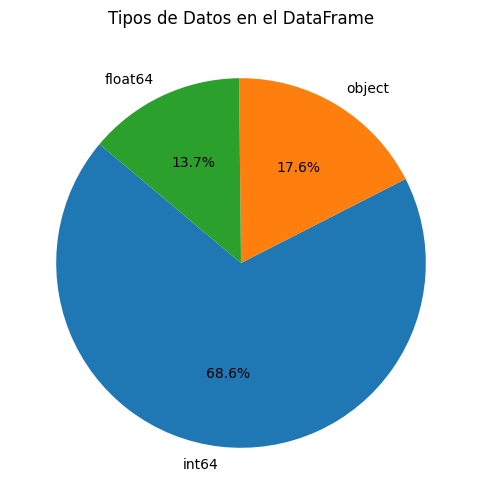

In [ ]:
# Crear un DataFrame que contenga los tipos de datos de cada columna
data_types = pd.DataFrame(fifa_all.dtypes, columns=['Tipo de Datos'])

# Contar el número de variables de cada tipo de datos
data_type_counts = data_types['Tipo de Datos'].value_counts()

# Crear el diagrama de pastel
plt.figure(figsize=(8, 6))
data_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Tipos de Datos en el DataFrame')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()

Vemos que hay un 17,6% de variables categóricas, un 13.7% de variables cuantitativas continuas y un 68.6% de variables cuantitavias discretas.

Para seguir profundizando en nuestras variables, vamos a mostrar un histograma de cada variable cuantitativa. Por su aparente normalidad pasaremos a partir de ahora a centrar nuestro análisis en:

- 'overal_rating'
- 'potential'

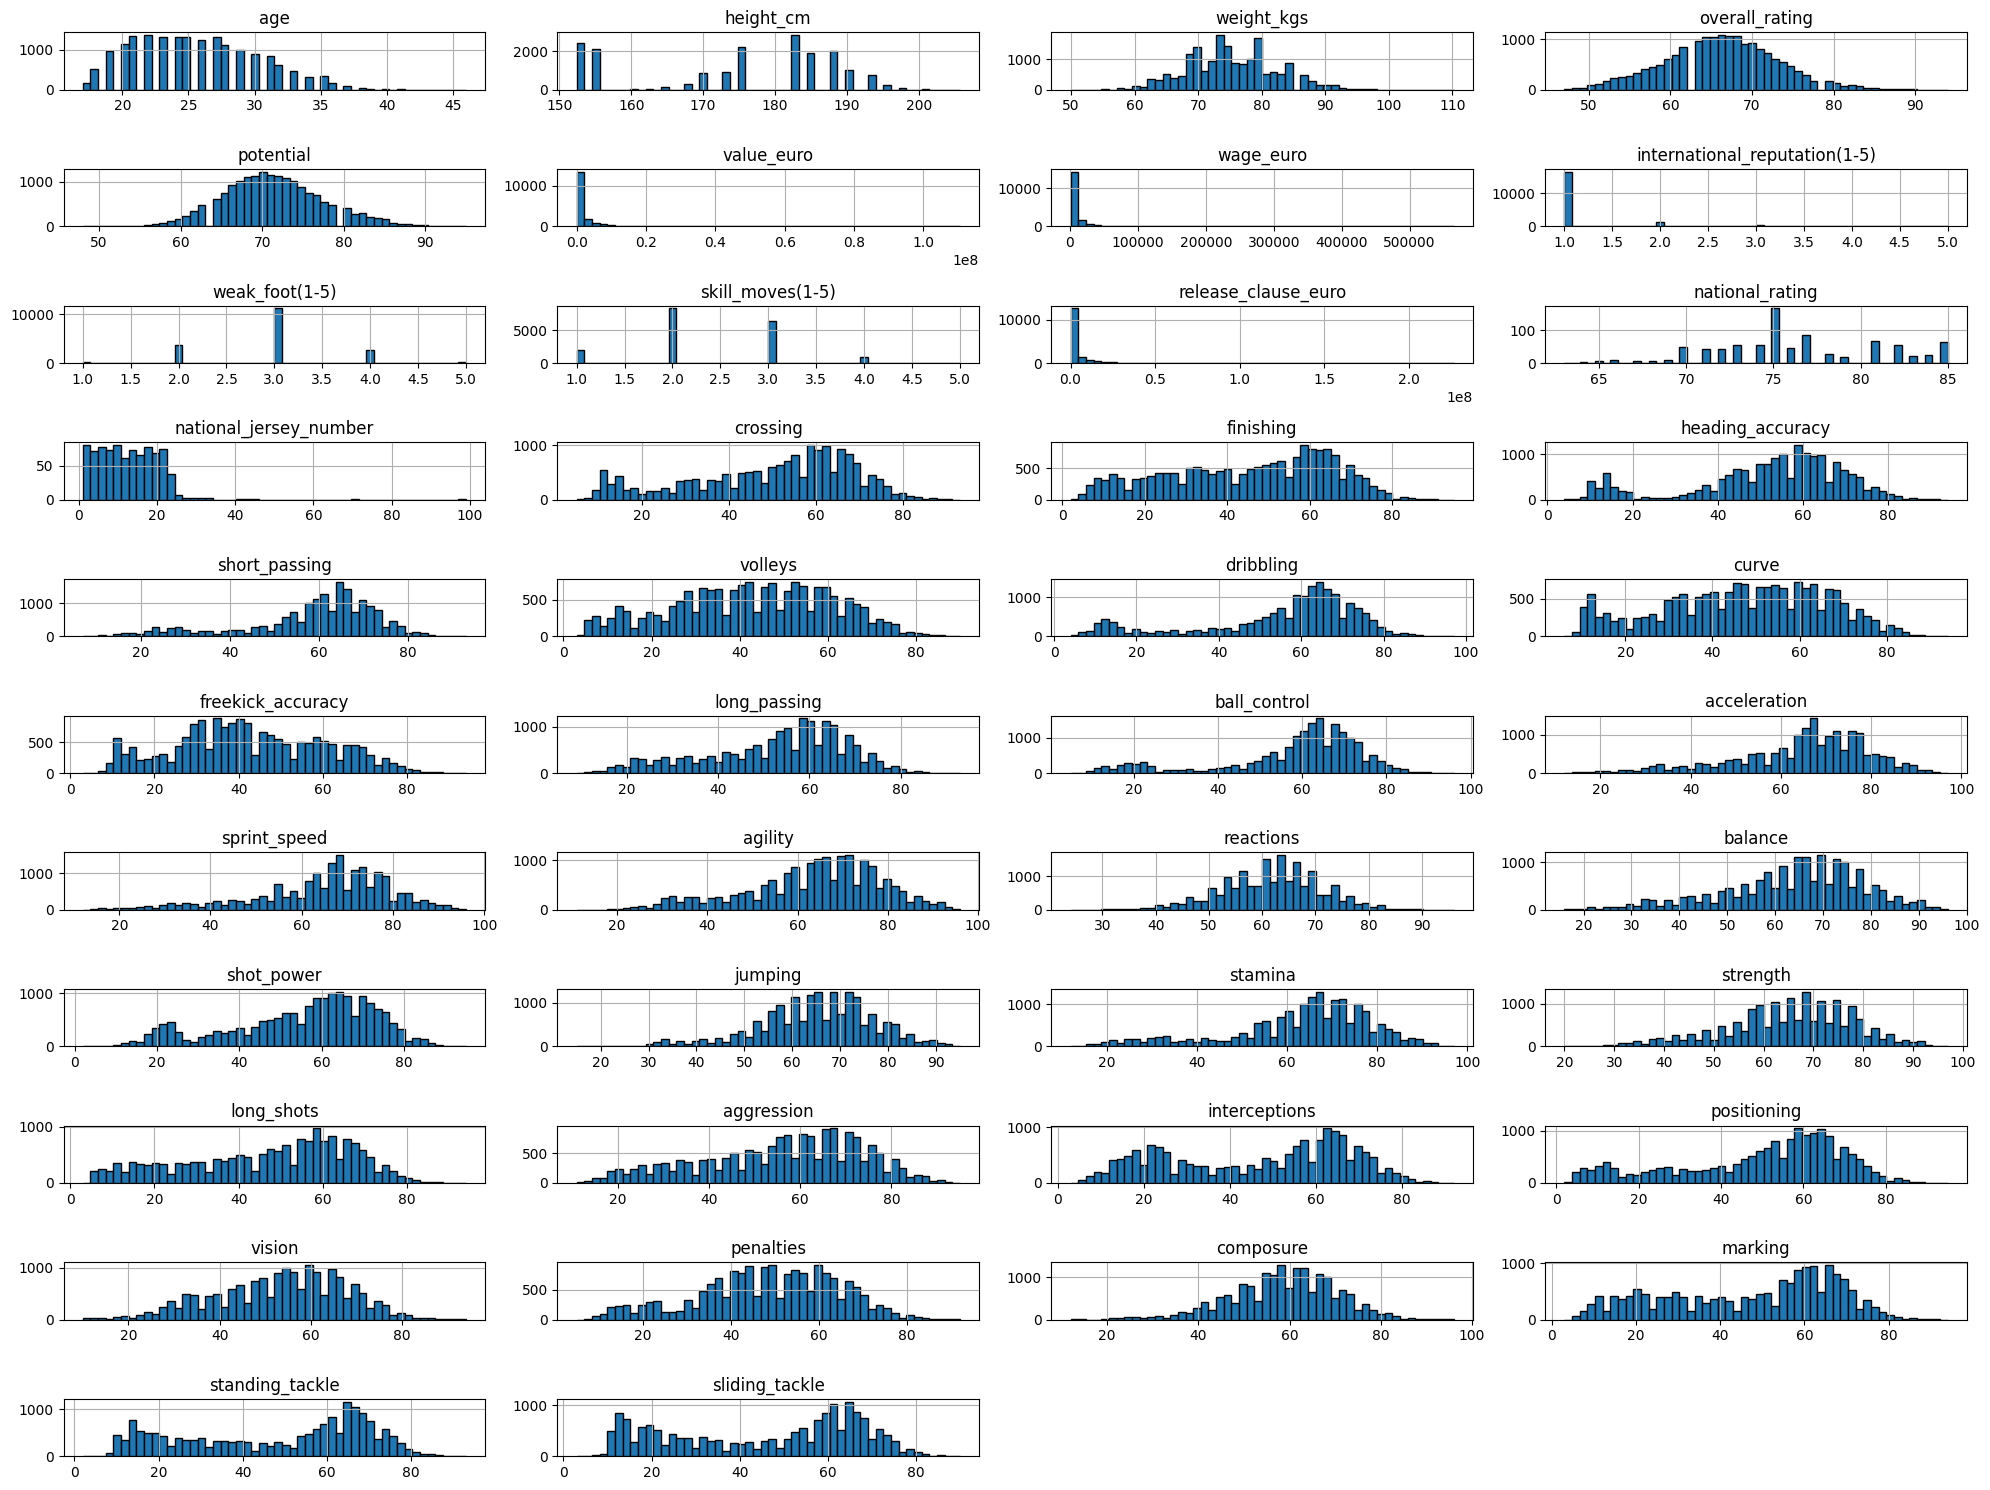

In [ ]:
columns = fifa_all.columns

fifa_all.hist(figsize=(20, 15), bins=50, layout=(-1, 4), edgecolor='black')
plt.tight_layout()
plt.show()

Vamos a analizar ahora que variables cualitativas tenemos y que grado de interés pueden generar para nuestro análisis.

In [ ]:
qualitative_columns = fifa_all.select_dtypes(include=['object']).columns
print(qualitative_columns)


Index(['name', 'full_name', 'birth_date', 'positions', 'nationality',
       'preferred_foot', 'body_type', 'national_team',
       'national_team_position'],
      dtype='object')


La celda anterior nos lista las variables cualitativas y descartamos directamente 'name', 'full_name', 'birth_date' por ser variables carentes de significación para nuestro análisis, así como 'preferred_foot', 'body_type',national_team', 'national_team_position', que aunque podrían ser analizadas, nos parecen menos interesantes de analizar que 'positions' y 'nationality'.

Así pués, nos centraremos a partir de ahora en las variables categoricas 'positions' y 'nationality'.

Vamos a analizar la distribución de frecuencias de cada una y a mostrarlas graficamente:


In [ ]:
frequency_of_nationalities = fifa_all['nationality'].value_counts()
frequency_of_nationalities

England                 1658
Germany                 1199
Spain                   1070
France                   925
Argentina                904
                        ... 
Papua New Guinea           1
South Sudan                1
Malta                      1
Yemen                      1
United Arab Emirates       1
Name: nationality, Length: 160, dtype: int64

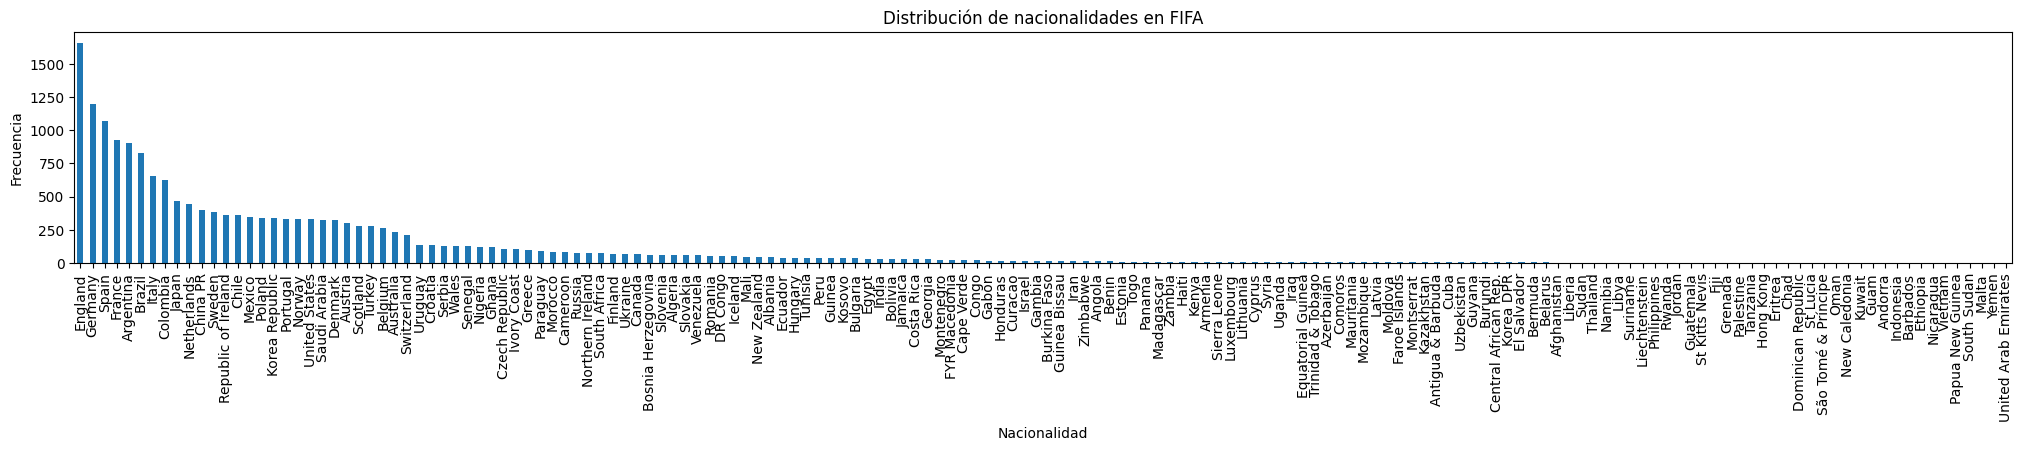

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(25, 3))
frequency_of_nationalities.plot(kind='bar')
plt.title('Distribución de nacionalidades en FIFA')
plt.xlabel('Nacionalidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


In [ ]:
frequency_of_positions = fifa_all['positions'].value_counts()
frequency_of_positions

CB              2243
GK              2065
ST              1747
CM               764
CDM,CM           709
                ... 
LB,LM,CB           1
CF,CM,ST           1
CB,ST              1
RB,ST              1
CAM,CM,RW,RM       1
Name: positions, Length: 890, dtype: int64

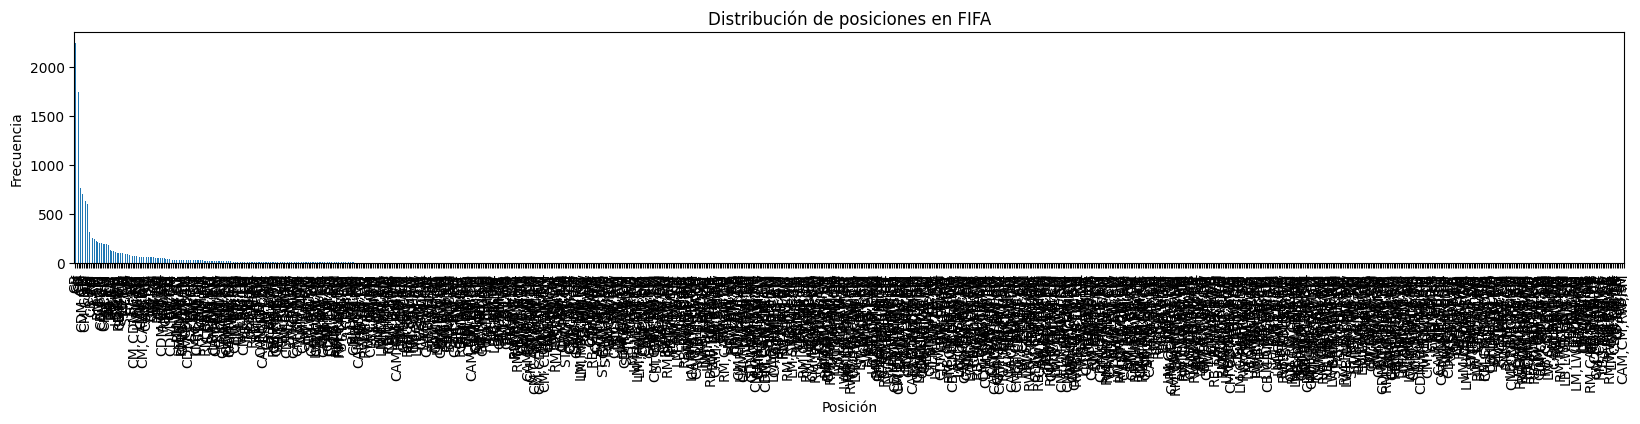

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(20, 3))
frequency_of_positions.plot(kind='bar')
plt.title('Distribución de posiciones en FIFA')
plt.xlabel('Posición')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


Por la gran dispersión de las dos variables categoricas elegídas, decidimos agrupar las nacionalidades por continentes y tomar la primera posición del listado de posiciones de cada jugador como la posición dominante del mismo en aras de simplificar nuestro analisis. Tambien decidimos traducir el nombre de la posición para mayor claridad en conclusiones posteriores y eliminar los valores nulos.

In [ ]:
# Group by positions
# Note: Since players can have multiple positions, here we consider just their primary position.
fifa_all['primary_position'] = fifa_all['positions'].apply(lambda x: x.split(',')[0])

# Renaming entries in column 'primary_position'
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'GK': 'PORTERO'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CAM': 'MEDIO OF'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CM': 'CENTROCAM.'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'LW': 'EXT IZQ'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'RW': 'EXT DER'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CB': 'DEF CENT'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'ST': 'ATAC'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CF': 'DEL CENT'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'CDM': 'CENT DEF'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'LB': 'LAT IZQ'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'RB': 'LAT DER'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'LM': 'CENT IZQ'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'RM': 'CENT DER'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'LWB': 'INT IZQ'})
fifa_all['primary_position'] = fifa_all['primary_position'].replace({'RWB': 'INT DER'})

# Definir una función para obtener el continente de un país
def get_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

# Aplicar la función a la columna 'nationality' para obtener el continente correspondiente
fifa_all['continent'] = fifa_all['nationality'].apply(get_continent)

# Ahora, fifa_all contiene una nueva columna 'continent' que indica el continente al que pertenece cada país

fifa_all = fifa_all.dropna(subset=['continent'])
fifa_all.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,primary_position,continent
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,22,94,94,75,96,33,28,26,DEL CENT,South America
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,56,84,91,67,88,59,57,22,MEDIO OF,Europe
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,64,82,88,82,87,63,67,67,CENTROCAM.,Europe
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,26,83,87,61,83,51,24,22,EXT IZQ,Europe
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,88,24,49,33,80,91,88,87,DEF CENT,Africa


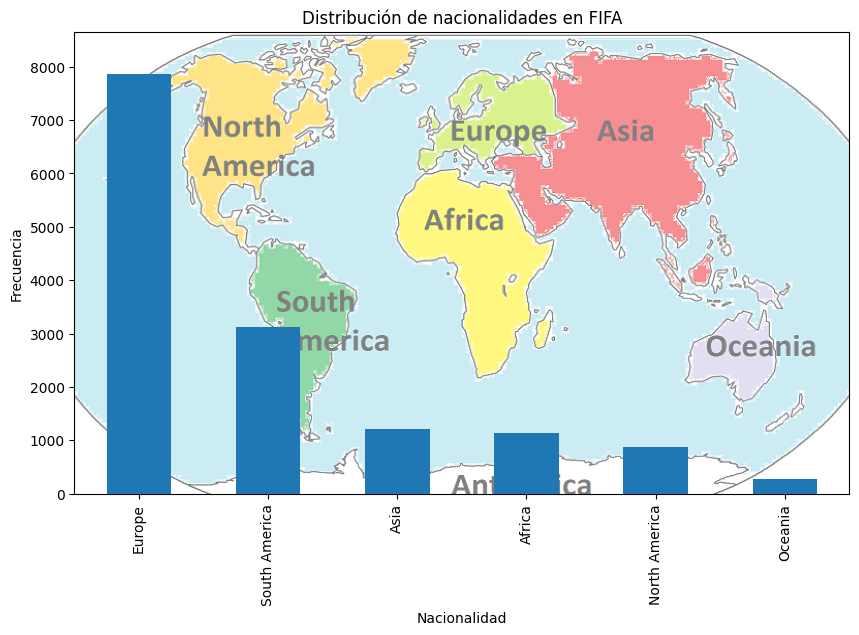

In [ ]:
# Obtener la frecuencia de cada nacionalidad
frequency_of_primary_position = fifa_all['continent'].value_counts()

# Fetch the image from the URL
response = requests.get('https://2.bp.blogspot.com/-a1v_9zZnjfk/W7JEwb0TYtI/AAAAAAAAJu4/DJcCFApKhP0d0oKkE4swQHpzo-R9d2SqwCLcBGAs/w1200-h630-p-k-no-nu/7%2Bcontinents.png')
img = Image.open(BytesIO(response.content))

# Convert the image to an array so matplotlib can plot it
img_array = np.array(img)

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming you have a general idea of your bar chart's x and y limits,
# Set a broad enough extent manually to cover the plot area
# Example: left, right, bottom, top
extent = [-1, len(frequency_of_primary_position), 0, max(frequency_of_primary_position) + max(frequency_of_primary_position) * 0.1]

# Display the image in the background with adjusted extent
ax.imshow(img_array, aspect='auto', extent=extent, zorder=0, alpha=0.5)

# Plot the bar chart on top of the image
frequency_of_primary_position.plot(kind='bar', ax=ax, zorder=3)
plt.title('Distribución de nacionalidades en FIFA')
plt.xlabel('Nacionalidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

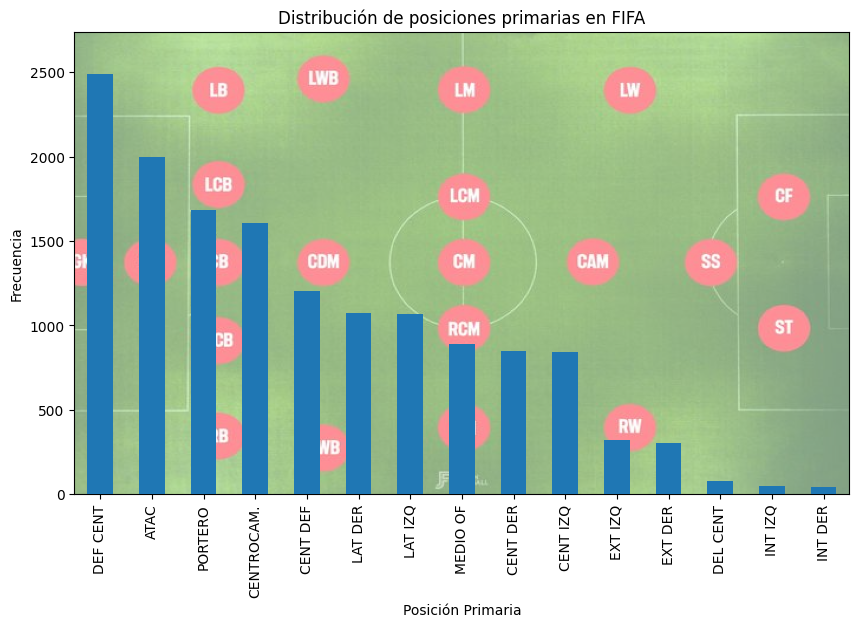

In [ ]:

# Obtener la frecuencia de cada nacionalidad
frequency_of_primary_position = fifa_all['primary_position'].value_counts()

# Fetch the image from the URL
response = requests.get('https://jobsinfootball.com/files/pictures/soccer_positions.jpeg')
img = Image.open(BytesIO(response.content))

# Convert the image to an array so matplotlib can plot it
img_array = np.array(img)

# Create the figure and axes for the plot, adjusting figsize as necessary
fig, ax = plt.subplots(figsize=(10, 6))

# Display the image in the background
# Note: Adjust the extent as necessary based on your dataset and desired appearance
extent = [-1, len(frequency_of_primary_position), 0, max(frequency_of_primary_position) + max(frequency_of_primary_position) * 0.1]
ax.imshow(img_array, aspect='auto', extent=extent, zorder=0, alpha=0.5)

# Plot the bar chart on top of the image
frequency_of_primary_position.plot(kind='bar', ax=ax, zorder=3)
plt.title('Distribución de posiciones primarias en FIFA')
plt.xlabel('Posición Primaria')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

De los dos gráficos anteriores, concluimos que tienen sentido agrupar las nacionalidades por continentes y clarificar las posiciciones en una sola.

## 2.2 Medidas descriptivas univariantes, de posición y dispersión.
Analizamos con describe los medidas descriptivas univariantes de las dos variables continuas elegidas con el siguiente resultado:

In [ ]:
columns_to_analize=['overall_rating','potential']
fifa_all[columns_to_analize].describe()

,overall_rating,potential
count,14496.000000,14496.000000
mean,66.955160,72.011038
std,6.849744,5.949449
min,47.000000,50.000000
25%,63.000000,68.000000
50%,67.000000,72.000000
75%,71.000000,76.000000
max,94.000000,95.000000


Podemos ver de manera gráfica los datos anteriores con un boxplot, o diagrama de bigotes en el que se muestra el rango intercuartílico delimitado por el primer y el tercer cuartil, bordes de la caja, la mediana de la muestra, y los valores extremos o outlayers.



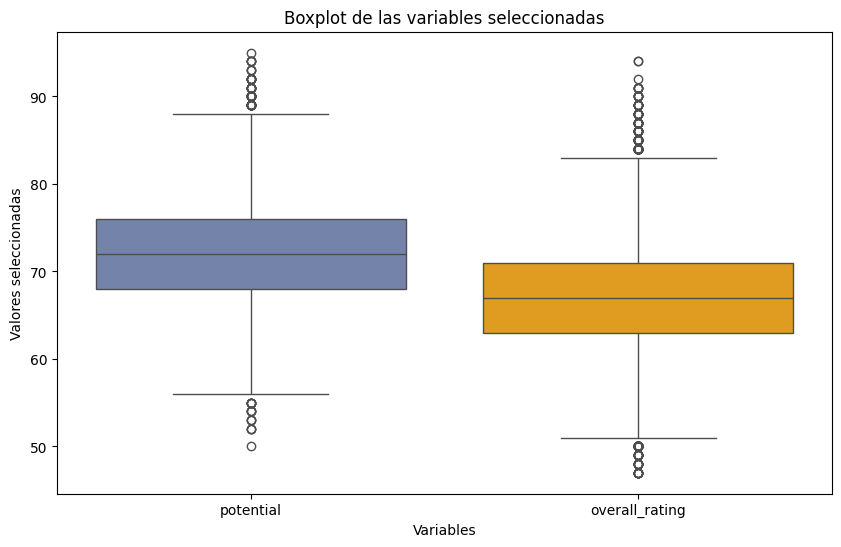

In [ ]:
# Boxplot de las variables 'age' y 'overall'
fifa_all_melted = fifa_all.melt(value_vars=['potential', 'overall_rating'], var_name='Variable', value_name='Value')

# Create a boxplot with customized colors, using a specific shade of blue for 'potential'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=fifa_all_melted, palette={'potential': '#6a7fb2', 'overall_rating': 'orange'})

plt.title('Boxplot de las variables seleccionadas')
plt.xlabel('Variables')
plt.ylabel('Valores seleccionadas')
plt.show()


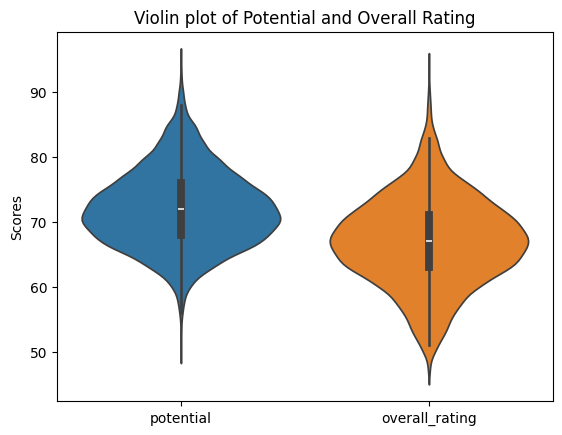

In [ ]:
# Create a violin plot for the 'potential' and 'overall_rating' variables
sns.violinplot(data=fifa_all[['potential', 'overall_rating']])

plt.title('Violin plot of Potential and Overall Rating')
plt.ylabel('Scores')
plt.show()

Adelantandonos un poco a nuestro analisis podemos ver en el grafico que sigue nuestra función de densidad de la variable overal_rating con su histograma, y su media en verde; junto con la representación de una normal tipificada con la media y la desviación típica de nuestra variable. Vemos un ajuste bastante aproximado.

[distfit] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


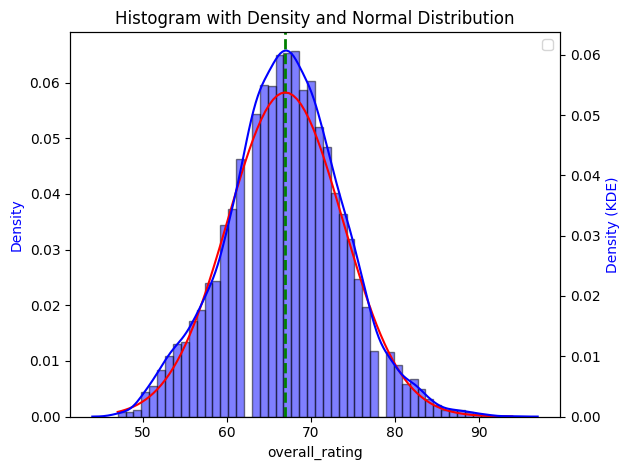

In [ ]:
# El siguiente gráfico me parece mucho mejor puesto que superponemos una distribución de probabilidad normal y podemos ver
# un ajuste bastante aproximado a una normal.

# Calcular la media y la desviación estándar de los datos
mean_overall_rating = fifa_all['overall_rating'].mean()
std_dev_overall_rating = fifa_all['overall_rating'].std()

# Crear puntos para graficar la distribución normal
x = np.linspace(fifa_all['overall_rating'].min(), fifa_all['overall_rating'].max(), 100)
y = norm.pdf(x, mean_overall_rating, std_dev_overall_rating)

# Crear figura y ejes
fig, ax = plt.subplots()

# Generar histograma en el primer eje
ax.hist(fifa_all['overall_rating'], bins=50, density=True, edgecolor='black', color='blue', alpha=0.5)
ax.set_xlabel('overall_rating')
ax.set_ylabel('Density', color='blue')

# Agregar línea vertical para la media
ax.axvline(mean_overall_rating, color='green', linestyle='dashed', linewidth=2, label='Mean')

# Agregar la distribución normal
ax.plot(x, y, color='red', label='Normal Distribution')

# Crear un segundo eje y duplicar el primero
ax2 = ax.twinx()

# Agregar la función de densidad (KDE) en el segundo eje
sns.kdeplot(fifa_all['overall_rating'], color='blue', ax=ax2)
ax2.set_ylabel('Density (KDE)', color='blue')

# Mostrar gráfico
plt.title('Histogram with Density and Normal Distribution')
plt.legend()
plt.tight_layout()
plt.show()



Al igual que con overall_rating, hacemos lo mismo con potential y vemos que aunque menor, tambien podemos ver cierta simetría con la distribución normal.

[distfit] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


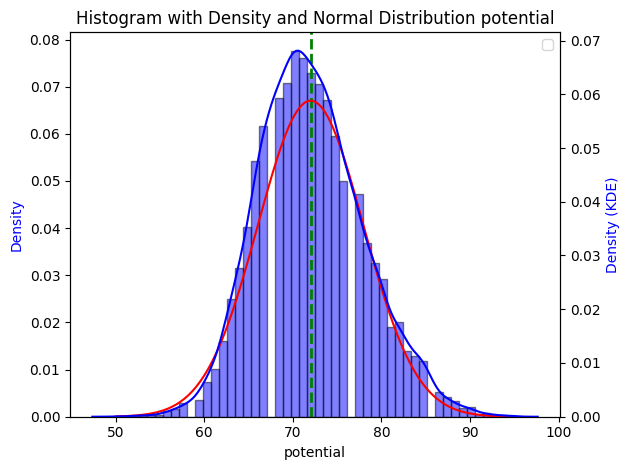

In [ ]:
# Repetimos con potential

# Calcular la media y la desviación estándar de los datos
mean_overall_rating = fifa_all['potential'].mean()
std_dev_overall_rating = fifa_all['potential'].std()

# Crear puntos para graficar la distribución normal
x = np.linspace(fifa_all['potential'].min(), fifa_all['potential'].max(), 100)
y = norm.pdf(x, mean_overall_rating, std_dev_overall_rating)

# Crear figura y ejes
fig, ax = plt.subplots()

# Generar histograma en el primer eje
ax.hist(fifa_all['potential'], bins=50, density=True, edgecolor='black', color='blue', alpha=0.5)
ax.set_xlabel('potential')
ax.set_ylabel('Density', color='blue')

# Agregar línea vertical para la media
ax.axvline(mean_overall_rating, color='green', linestyle='dashed', linewidth=2, label='Mean')

# Agregar la distribución normal
ax.plot(x, y, color='red', label='Normal Distribution')

# Crear un segundo eje y duplicar el primero
ax2 = ax.twinx()

# Agregar la función de densidad (KDE) en el segundo eje
sns.kdeplot(fifa_all['potential'], color='blue', ax=ax2)
ax2.set_ylabel('Density (KDE)', color='blue')

# Mostrar gráfico
plt.title('Histogram with Density and Normal Distribution potential')
plt.legend()
plt.tight_layout()
plt.show()

2.2 Medidas descriptivas bivariantes: covarianza y coeficiente de Pearson

In [ ]:
fifa_selected_variables=fifa_all[['potential','overall_rating']]
fifa_selected_variables.head(6)
# ESTo lo quitaría

,potential,overall_rating
0,94,94
1,89,88
2,91,88
3,88,88
4,91,88
5,90,88


In [ ]:
fifa_selected_variables=fifa_all[['potential','overall_rating']]
fifa_selected_variables.describe()

,potential,overall_rating
count,14496.000000,14496.000000
mean,72.011038,66.955160
std,5.949449,6.849744
min,50.000000,47.000000
25%,68.000000,63.000000
50%,72.000000,67.000000
75%,76.000000,71.000000
max,95.000000,94.000000


Vamos a ver de manera gráfica como se comportan las dos variables:

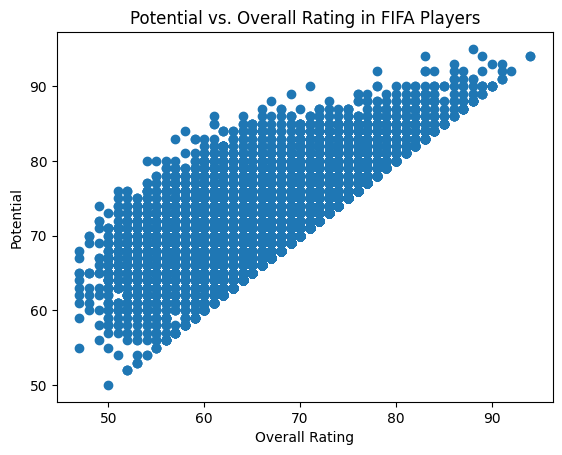

In [ ]:
plt.scatter(fifa_all['overall_rating'], fifa_all['potential'])

plt.ylabel('Potential')
plt.xlabel('Overall Rating')
plt.title('Potential vs. Overall Rating in FIFA Players')

plt.show()

Vemos una correlación positiva fuerte entre las dos variables, lo que nos hace pensar en una posible correlación entre las dos, pues a medida que una se hace más grande la otra también. Como cabía esperar, el potencial de cada jugador solo puede igualar o mejorar su actual rating. Es decir, cabe esperar que los jugadores mejoren su actual nivel o, al menos, que se mantengan.

Ahora, vamos a proceder a calcular su coef de correlación
Calculamos dicho coeficiente y vemos que sí. No hay una correlación perfecta positiva pero vemos que si existe.

In [ ]:
correlation_matrix = fifa_all[['potential','overall_rating']].corr(method='spearman')
# Esto nos devuelve lo mismo que el anterior, y no podemo calcular ninguna correlación revisar lo siguiente:

correlation_matrix

,potential,overall_rating
potential,1.000000,0.610264
overall_rating,0.610264,1.000000


# 3. Comprobación de la normalidad de alguna/s variable/s del conjunto de datos.

Tras las visualizaciones anteriores de nuestras variables continuas y las apariencias de normalidad vamos, mediante la librería distfit a analizar matematicamente si nuestras asumciones de normalidad son correctas o qué otras posibles distribuciones de probabilidad se ajustarían mejor a 'overall_rating' y 'potential':

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.034634] [loc=66.955 scale=6.850]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0767882] [loc=47.000 scale=19.955]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 0.0767882] [loc=-4294967249.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [0.09 sec] [RSS: 0.0365272] [loc=66.558 scale=5.831]
[distfit] >INFO> [t         ] [1.19 sec] [RSS: 0.0345666] [loc=66.952 scale=6.700]
[distfit] >INFO> [genextreme] [0.89 sec] [RSS: 0.0353982] [loc=64.332 scale=6.780]
[distfit] >INFO> [gamma     ] [0.21 sec] [RSS: 0.0346768] [loc=-321.561 scale=0.121]
[distfit] >INFO> [lognorm   ] [0.02 sec] [RSS: 0.034675] [loc=-532.976 scale=599.892]
[distfit] >INFO> [beta      ] [0.24 sec] [RSS: 0.0347023] [loc=-191.723 scale=857851.599]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0660605] [loc=47.000 scale=47.000]
[distfit] >INFO> [loggamma  ] [0.20 sec] [RSS: 0.0346148] [loc=-1340.990 scale=206.809]
[di

          name     score           loc          scale  \
0            t  0.034567     66.951764       6.700384   
1     loggamma  0.034615  -1340.989679     206.808831   
2         norm  0.034634      66.95516       6.849508   
3      lognorm  0.034675   -532.976173     599.892236   
4        gamma  0.034677   -321.560616       0.120763   
5         beta  0.034702   -191.722822  857851.598606   
6   genextreme  0.035398     64.331863       6.779752   
7     dweibull  0.036527     66.558092       5.831256   
8      uniform  0.066061          47.0           47.0   
9       pareto  0.076788 -4294967249.0   4294967296.0   
10       expon  0.076788          47.0       19.95516   

                                       arg  \
0                      (46.2785791710783,)   
1                      (905.486319525809,)   
2                                       ()   
3                  (0.011416715338438504,)   
4                    (3217.1606013316523,)   
5   (1424.8942962675383, 4723942.152702

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nt(df=46.2786, loc=66.9518, scale=6.70038)'}, xlabel='Values', ylabel='Frequency'>)

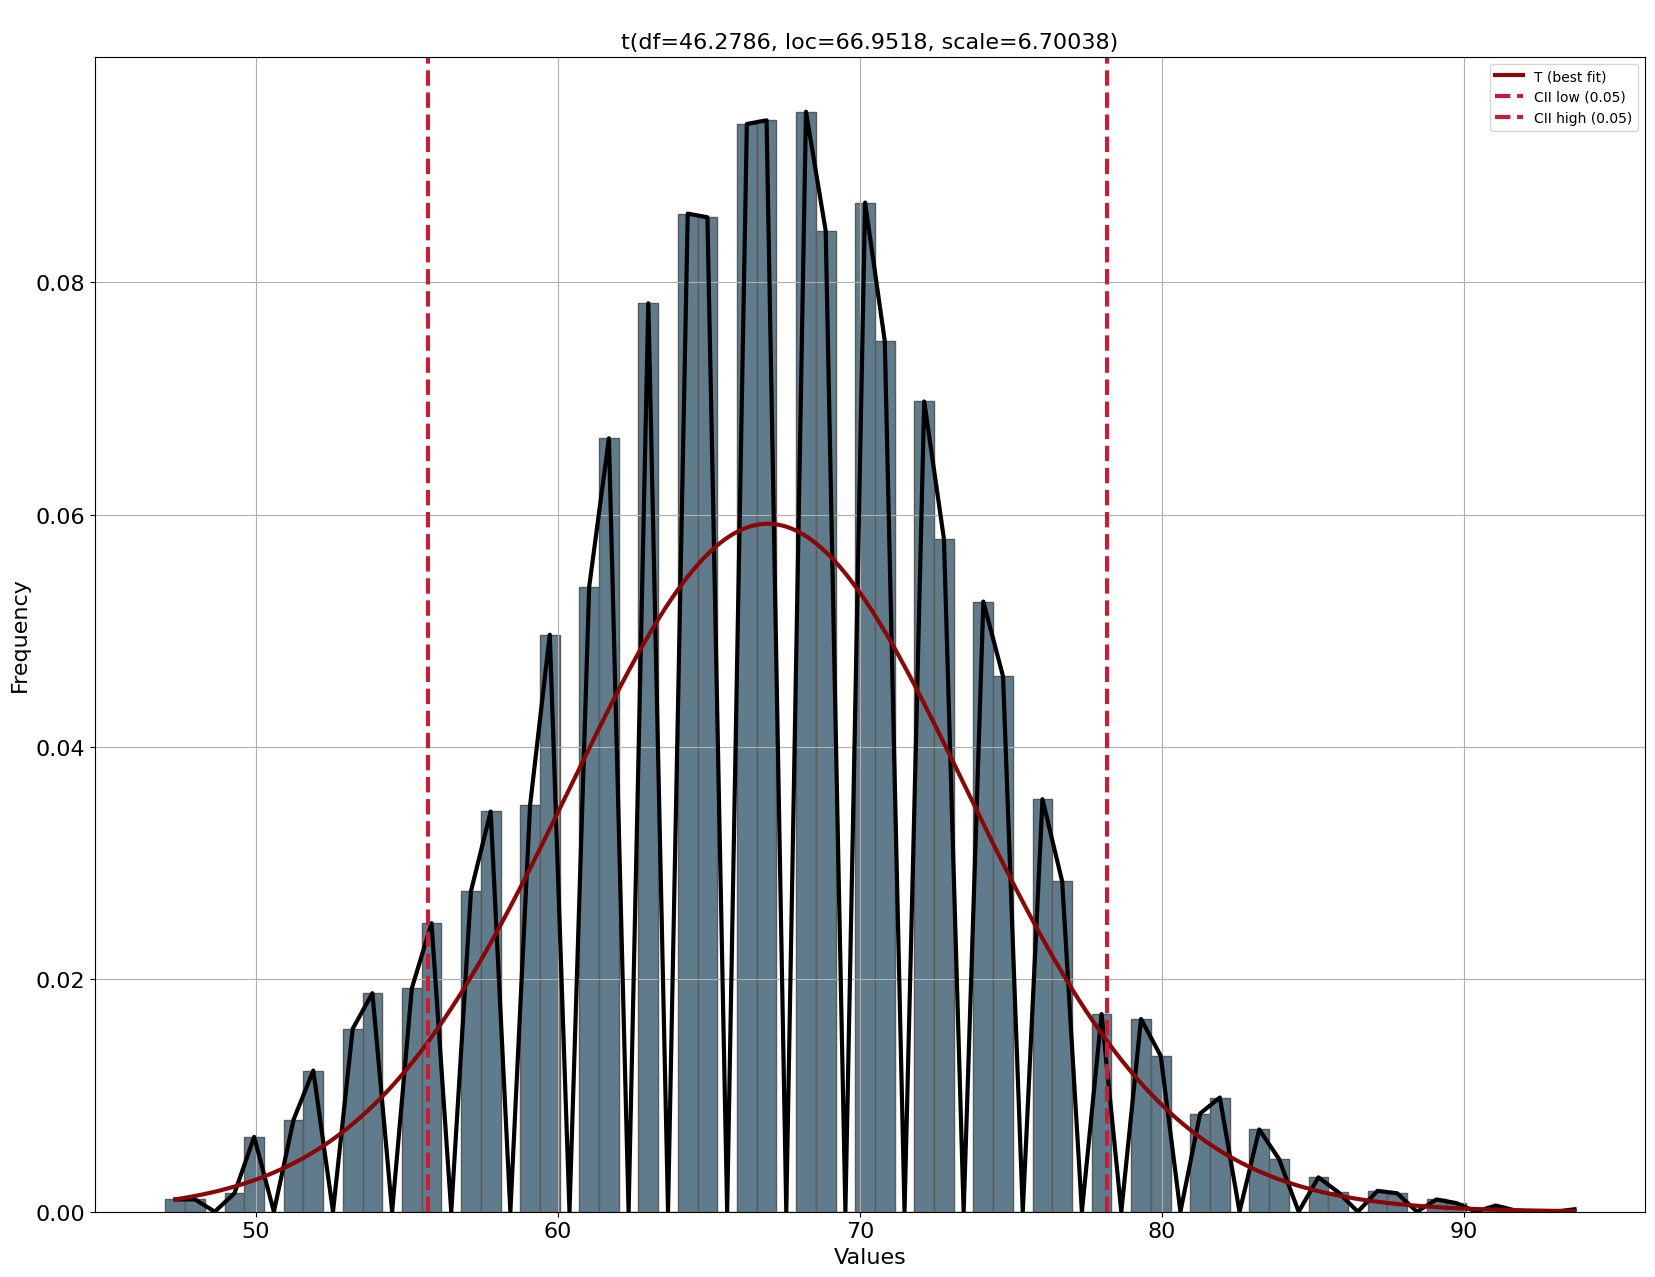

In [ ]:
# Initialize distfit
dist = distfit()

# Fit the distribution to your data
dist.fit_transform(fifa_all["overall_rating"])

# Print the summary of the best fit distribution
print(dist.summary)

# Optionally, you can also plot the best fit distribution against your data
dist.plot()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0396767] [loc=72.011 scale=5.949]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.094536] [loc=50.000 scale=22.011]
[distfit] >INFO> [pareto    ] [0.02 sec] [RSS: 0.094536] [loc=-4294967246.000 scale=4294967296.000]
[distfit] >INFO> [dweibull  ] [0.12 sec] [RSS: 0.0412437] [loc=71.556 scale=5.122]
[distfit] >INFO> [t         ] [1.85 sec] [RSS: 0.0396212] [loc=71.989 scale=5.876]
[distfit] >INFO> [genextreme] [1.90 sec] [RSS: 0.038989] [loc=69.673 scale=5.622]
[distfit] >INFO> [gamma     ] [0.07 sec] [RSS: 0.0389687] [loc=32.645 scale=0.898]
[distfit] >INFO> [lognorm   ] [0.01 sec] [RSS: 0.0389467] [loc=15.163 scale=56.540]
[distfit] >INFO> [beta      ] [0.47 sec] [RSS: 0.0389795] [loc=34.839 scale=533.514]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0792524] [loc=50.000 scale=45.000]
[distfit] >INFO> [loggamma  ] [0.20 sec] [RSS: 0.0398063] [loc=-1688.489 scale=238.960]
[distfit] >INF

          name     score           loc         scale  \
0      lognorm  0.038947     15.162712     56.539606   
1        gamma  0.038969     32.645281      0.898122   
2         beta   0.03898     34.839015    533.513505   
3   genextreme  0.038989     69.673379       5.62243   
4            t  0.039621     71.988983      5.876116   
5         norm  0.039677     72.011038      5.949244   
6     loggamma  0.039806  -1688.489182    238.959605   
7     dweibull  0.041244     71.555988       5.12178   
8      uniform  0.079252          50.0          45.0   
9       pareto  0.094536 -4294967246.0  4294967296.0   
10       expon  0.094536          50.0     22.011038   

                                      arg  \
0                  (0.10435444637462324,)   
1                    (43.83118967823402,)   
2   (36.325054347986566, 485.01545870984)   
3                  (0.18823730277704265,)   
4                    (81.78550501050199,)   
5                                      ()   
6           

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nlognorm(s=0.104354, loc=15.1627, scale=56.5396)'}, xlabel='Values', ylabel='Frequency'>)

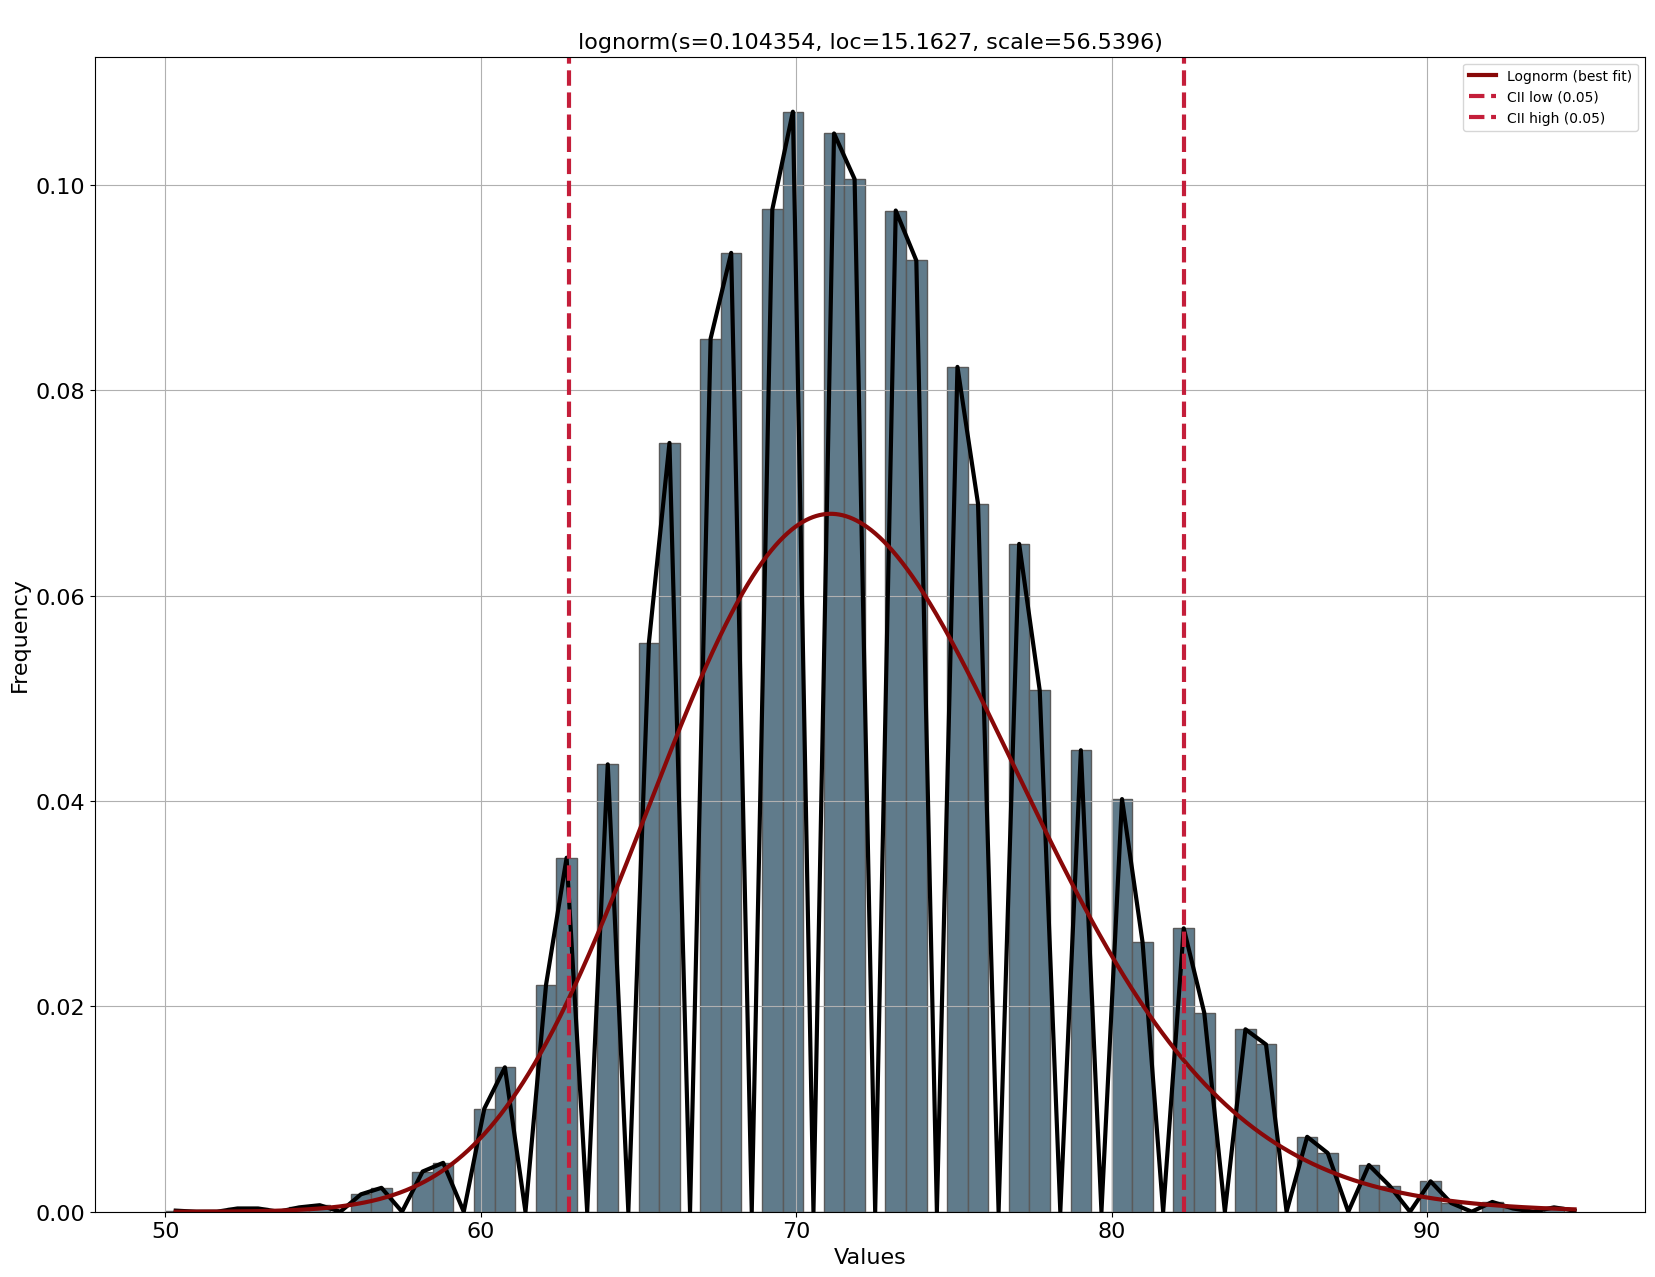

In [ ]:
# Initialize distfit
dist = distfit()

# Fit the distribution to your data
dist.fit_transform(fifa_all["potential"])

# Print the summary of the best fit distribution
print(dist.summary)

# Optionally, you can also plot the best fit distribution against your data
dist.plot()

Como observamos, 'overall_rating' se ajusta mejor a una distribución t-student, mientras que 'potential' se ajusta mejor a una log-normal. Por tanto, a partir de aquí procedemos con el análisis considerando únicamente 'overall_rating'.


Es posible transformar una variable que sigue una distribución t-student para que se aproxime a una distribución normal. Esto se puede lograr utilizando la transformación de Box-Cox o la transformación de Yeo-Johnson.

La transformación de Box-Cox es adecuada para variables que son estrictamente positivas,como la nuestra, mientras que la transformación de Yeo-Johnson puede manejar variables que contienen valores negativos.



Transformamos 'overall_rating' con Box-Cox para ajustarla a una normal y lo mostramos en un gráfico. Podemos hacer lo mismo para la otra variable.

In [ ]:
transformed_variable2, lambda_value2 = boxcox(fifa_all['overall_rating'])
fifa_all['transf_overall_rating'] = transformed_variable2
fifa_all.head(5)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,primary_position,continent,transf_overall_rating
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,94,75,96,33,28,26,DEL CENT,South America,63.874005
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,84,91,67,88,59,57,22,MEDIO OF,Europe,60.151831
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,88,82,87,63,67,67,CENTROCAM.,Europe,60.151831
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,83,87,61,83,51,24,22,EXT IZQ,Europe,60.151831
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,24,49,33,80,91,88,87,DEF CENT,Africa,60.151831


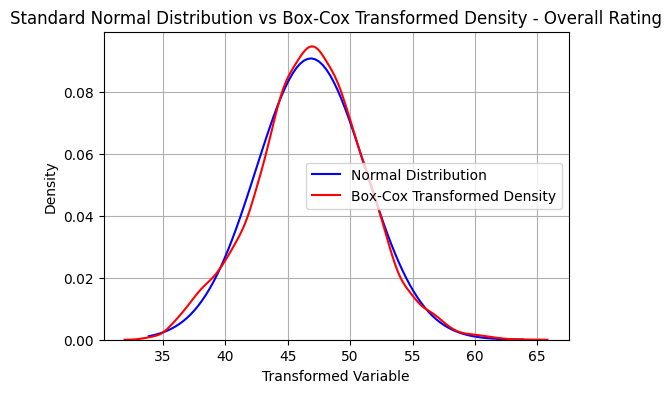

In [ ]:


# Calcular la media y la desviación estándar de la variable transformada
mean_transformed2 = transformed_variable2.mean()
std_dev_transformed2 = transformed_variable2.std()

# Calcular los límites del rango de la variable transformada
min_value_transformed2 = transformed_variable2.min()
max_value_transformed2 = transformed_variable2.max()

# Crear puntos para graficar la distribución normal tipificada
x_normal = np.linspace(min_value_transformed2, max_value_transformed2, 100)
y_normal = norm.pdf(x_normal, loc=mean_transformed2, scale=std_dev_transformed2)

# Crear figura y ejes
plt.figure(figsize=(6, 4))

# Graficar la densidad de la distribución normal tipificada
plt.plot(x_normal, y_normal, color='blue', label='Normal Distribution')

# Graficar la densidad de la variable transformada utilizando Box-Cox
sns.kdeplot(transformed_variable2, color='red', label='Box-Cox Transformed Density')

plt.title('Standard Normal Distribution vs Box-Cox Transformed Density - Overall Rating')
plt.xlabel('Transformed Variable')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

De nuevo, usamos la librería distfit para comprobar la distribución a la que mejor se ajusta 'transf_overall_rating':

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0841037] [loc=46.844 scale=4.391]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.189343] [loc=33.852 scale=12.992]
[distfit] >INFO> [pareto    ] [0.02 sec] [RSS: 0.189343] [loc=-1073741790.148 scale=1073741824.000]
[distfit] >INFO> [dweibull  ] [0.09 sec] [RSS: 0.0874957] [loc=47.172 scale=3.736]
[distfit] >INFO> [t         ] [0.96 sec] [RSS: 0.0841031] [loc=46.844 scale=4.391]
[distfit] >INFO> [genextreme] [0.44 sec] [RSS: 0.0859243] [loc=45.171 scale=4.367]
[distfit] >INFO> [gamma     ] [0.08 sec] [RSS: 0.0841074] [loc=-3962.079 scale=0.005]
[distfit] >INFO> [lognorm   ] [0.03 sec] [RSS: 0.0841072] [loc=-6340.645 scale=6387.487]
[distfit] >INFO> [beta      ] [0.20 sec] [RSS: 0.0841085] [loc=-2707.874 scale=16811.045]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.161901] [loc=33.852 scale=30.022]
[distfit] >INFO> [loggamma  ] [0.19 sec] [RSS: 0.0840879] [loc=-644.667 scale=108.055]
[d

          name     score                loc         scale  \
0     loggamma  0.084088        -644.667162    108.054606   
1            t  0.084103          46.843782      4.391203   
2         norm  0.084104          46.843782      4.391418   
3      lognorm  0.084107       -6340.644743   6387.487016   
4        gamma  0.084107       -3962.079088       0.00481   
5         beta  0.084108       -2707.874033   16811.04521   
6   genextreme  0.085924          45.171162      4.367464   
7     dweibull  0.087496          47.172039      3.735517   
8      uniform  0.161901          33.851681     30.022325   
9        expon  0.189343          33.851681     12.992102   
10      pareto  0.189343 -1073741790.148319  1073741824.0   

                                         arg  \
0                       (602.0983635125372,)   
1                       (21437.69150053089,)   
2                                         ()   
3                   (0.0006875030280303367,)   
4                       (83

(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nloggamma(c=602.098, loc=-644.667, scale=108.055)'}, xlabel='Values', ylabel='Frequency'>)

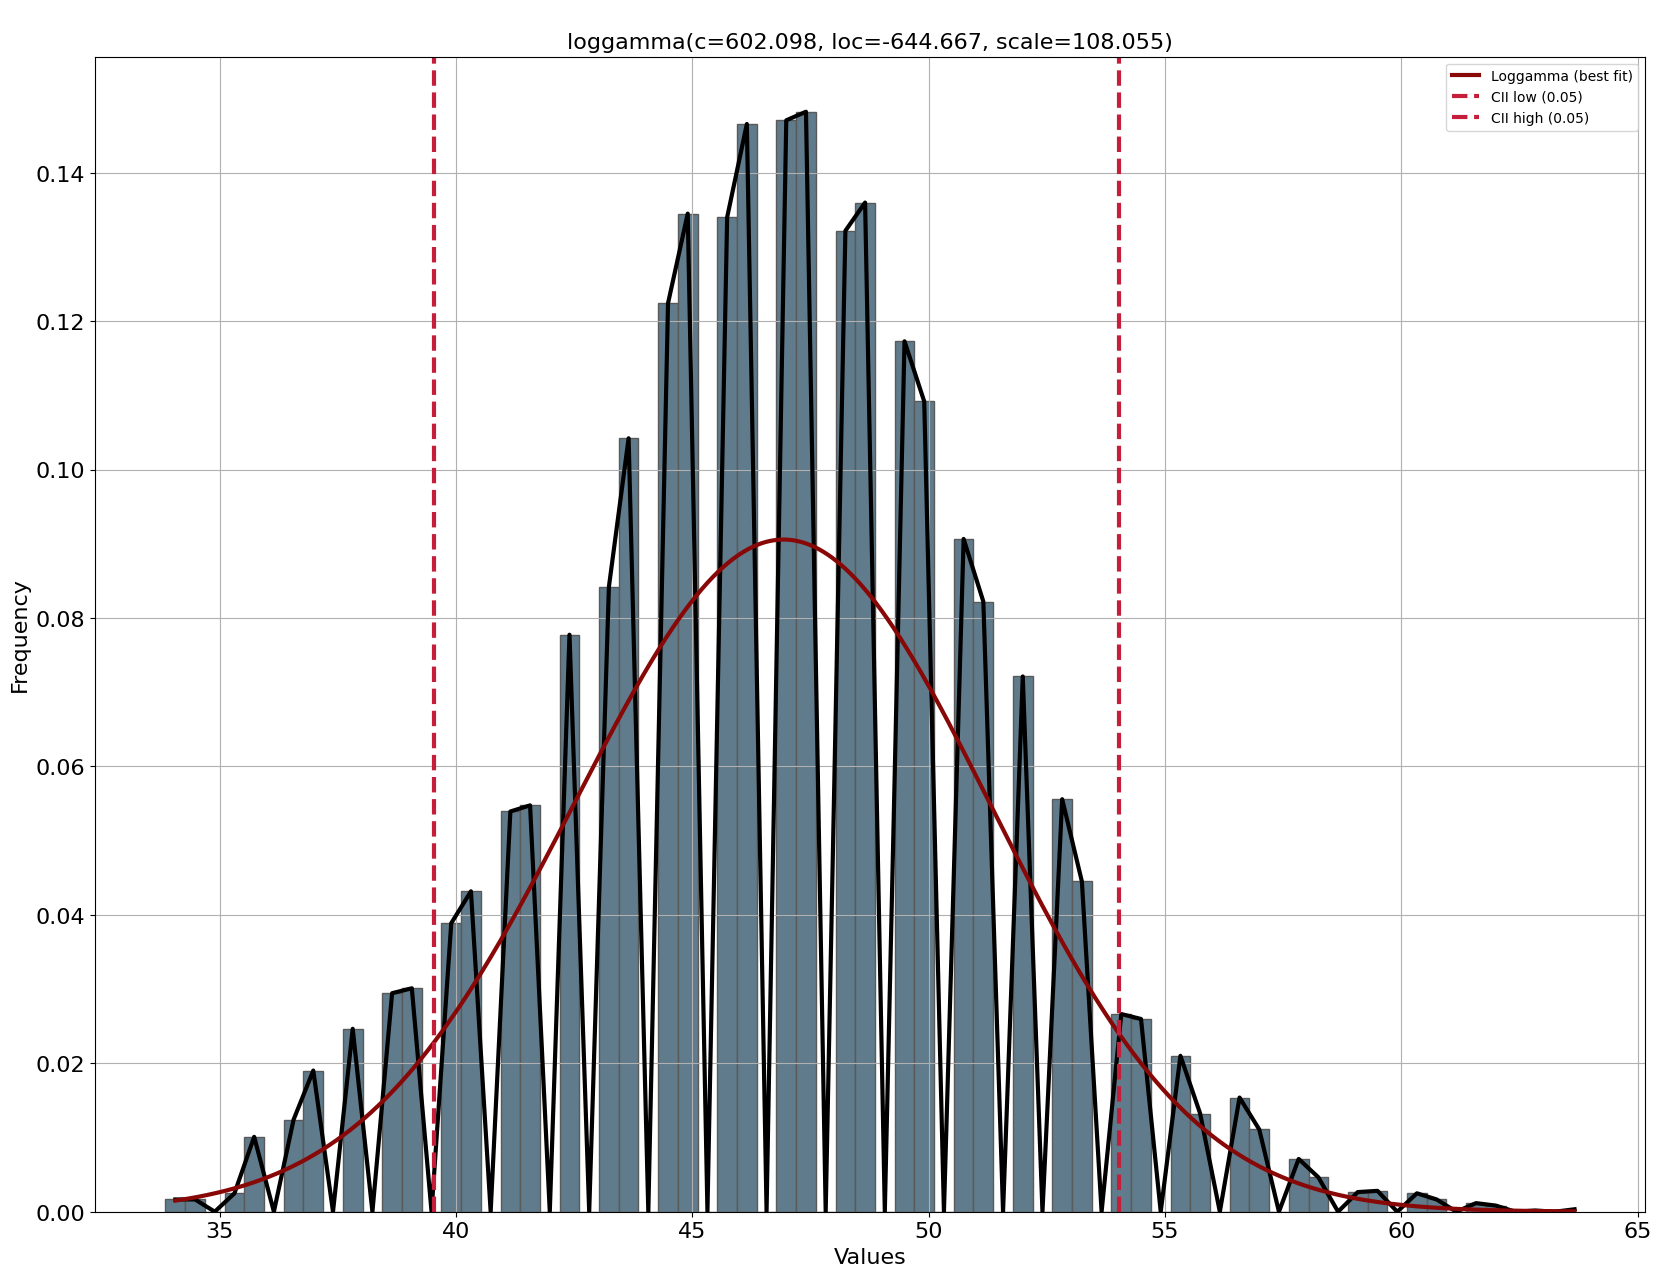

In [ ]:
# Initialize distfit
dist = distfit()

# Fit the distribution to your data
dist.fit_transform(fifa_all["transf_overall_rating"])

# Print the summary of the best fit distribution
print(dist.summary)

# Optionally, you can also plot the best fit distribution against your data
dist.plot()

Observamos que, pese a que una distribución normal sigue sin ser la que mejor se ajusta, su puntuación es prácticamente idéntica a una t-student y similar a una log-gamma (la que mejor se ajusta ahora). Por tanto, la transformación Box-Cox ha sido efectiva.

# 4. Estimación puntual y por intervalos de los parámetros poblacionales.






In [ ]:
# Estimación de los intervalos de confianza de la media muestral con una probabilidad del 95 %
# Cogemos la t de estudent porque no conocemos la desviación típica poblacional
import scipy.stats

size = fifa_all['transf_overall_rating'].count()

sample_mean = fifa_all['transf_overall_rating'].mean()

t_critical = stats.t.ppf(q = 0.975, df=199)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)

pop_stdev = fifa_all['transf_overall_rating'].std()  # Get the population standard deviation

margin_of_error = t_critical * (pop_stdev/math.sqrt(size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
print(f'Media muestral de potential: {sample_mean}')
print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.971956544249395
Media muestral de potential: 46.84378217924952
Confidence interval:
(46.771854998271905, 46.91570936022714)


In [ ]:
sample_size = fifa_all['transf_overall_rating'].count()

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(fifa_all['transf_overall_rating'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    t_critical = stats.t.ppf(q = 0.975,df=199)  # Get the z-critical value*

    pop_stdev = fifa_all['transf_overall_rating'].std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = t_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)

    intervals.append(confidence_interval)

    # print(sample_means)
    # print(intervals)

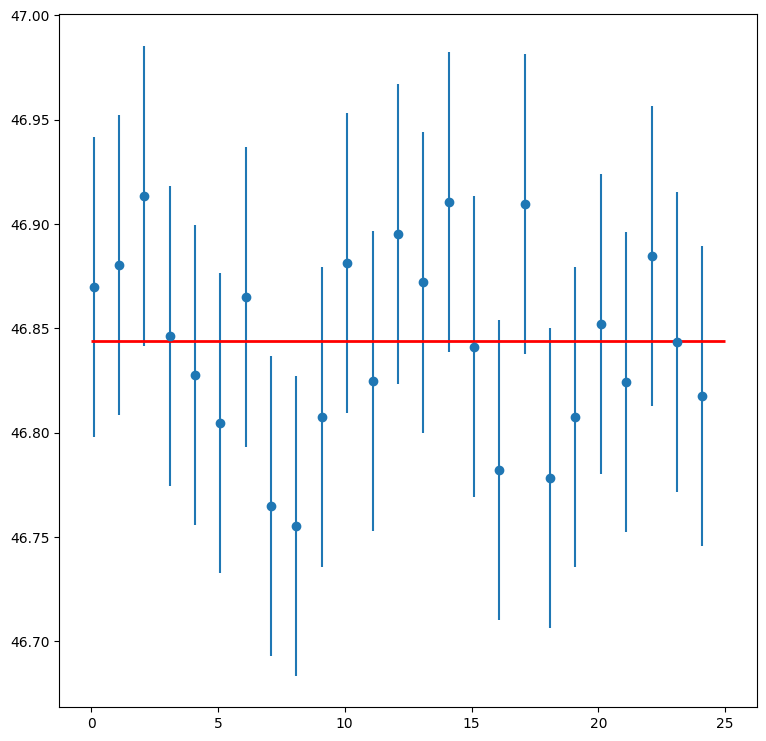

In [ ]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1),
             y=sample_means,
             yerr=[(bot-top)/2 for top,bot in intervals],
             fmt='o')
potential_overall_mean=fifa_all['transf_overall_rating'].mean()
plt.hlines(xmin=0, xmax=25,
           y=potential_overall_mean,
           linewidth=2.0,
           color="red")

In [ ]:
stats.t.interval(confidence = 0.95,              # Confidence level
                 df= sample_size,                    # Degrees of freedom,revisarlos,son los del ejemplo
                 loc = sample_mean,         # Sample mean
                 scale = pop_stdev)             # Standard deviation estimate

(38.209403420654205, 55.425478168808816)

# 5. Realización de contrastes de hipótesis oportunos para realizar inferencia con los datos

Tras realizar el distfit ya hemos visto con anterioridad que inicialmente la variable 'overall_rating' sigue una distribución t-student. Posteriormente, aplicamos la transformación Box-Cox a 'overall_rating' y la almacenamos en fifa_all['transf_overall_rating`].




In [ ]:
# Realizamos la prueba t
# Hipótesis nula: la media muestral y la media poblacional son iguales.
# Hipótesis alternativa: la media muestral y la media poblacional son distintas.
t_statistic, p_value = ttest_1samp(fifa_all['overall_rating'], 50)
print(fifa_all['transf_overall_rating'].mean()) # Comparamos con la media de la muestra

# Imprimimos los resultados
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

# Interpretamos los resultados
nivel_significancia = 0.05
if p_value < nivel_significancia:
    print("Existe evidencia significativa para concluir que la media de la muestra es diferente de la media poblacional especificada.")
else:
    print("No hay evidencia suficiente para concluir que la media de la muestra es diferente de la media poblacional especificada.")


46.84378217924952
Estadístico t: 298.0242655331788
Valor p: 0.0
Existe evidencia significativa para concluir que la media de la muestra es diferente de la media poblacional especificada.


Hemos estimado que la media de 'overall_rating' esperada para la población, la cual definimos como el conjunto de deportistas federados del mundo, sería un 50 sobre 100. Por tanto, tras el análisis debemos rechazar la hipótesis nula y tomar que la media 'overall_rating' de los jugadores FIFA y de los jugadores federados es distinta.

In [ ]:
# t-test media
# h0=media muestral es igual a la media poblacional

# Datos
# Calcula la media muestral
media_muestral = fifa_all['transf_overall_rating'].mean()

# Calcula la desviación estándar muestral
desviacion_estandar = fifa_all['transf_overall_rating'].std()

# Calcula el tamaño de la muestra
n = fifa_all['transf_overall_rating'].count()


# Calculamos el intervalo de confianza del 95% para la media poblacional
grados_libertad = n - 1
t_valor = t.ppf(1 - 0.025, df=grados_libertad)  # 0.025 para una prueba de dos colas
error_estandar = desviacion_estandar / np.sqrt(n)
intervalo_superior = media_muestral + t_valor * error_estandar
intervalo_inferior = media_muestral - t_valor * error_estandar

# Imprimimos el intervalo de confianza
print("Intervalo de confianza del 95% para la media poblacional:", (intervalo_inferior, intervalo_superior))

# Comprobamos si la media poblacional está dentro del intervalo de confianza
if intervalo_inferior <= media_muestral <= intervalo_superior:
    print(f'La media muestral {media_muestral} cae dentro del intervalo de confianza.')
else:
    print(f'La media muestral {media_muestral} no cae dentro del intervalo de confianza.')

Intervalo de confianza del 95% para la media poblacional: (46.77228645724569, 46.915277901253354)
La media muestral 46.84378217924952 cae dentro del intervalo de confianza.


Con esto, hemos calculado un intervalo de confianza al 95% para capturar la media muestral de forma más representativa.

# 6. Realización de ANOVA (cond. de aplicabilidad, ANOVA, post-hoc) para obtener conclusiones de los datos


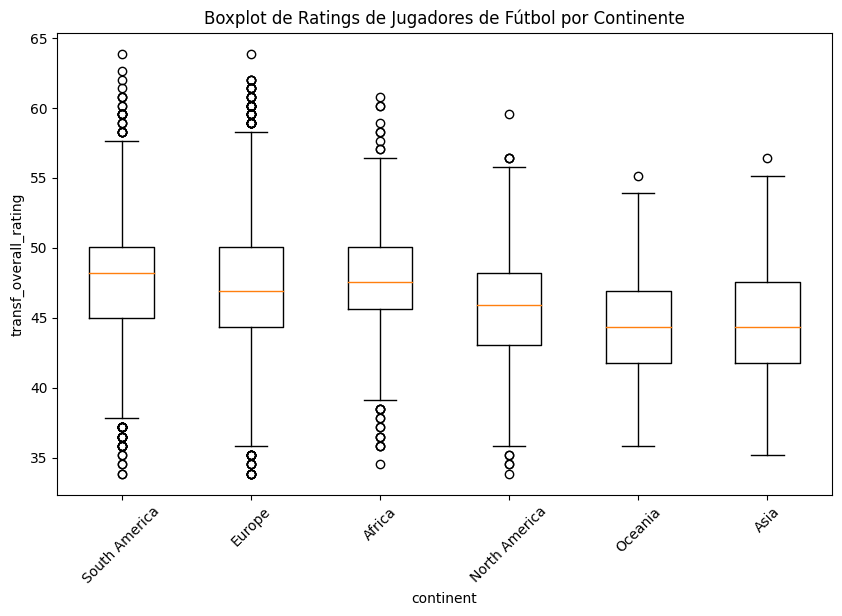

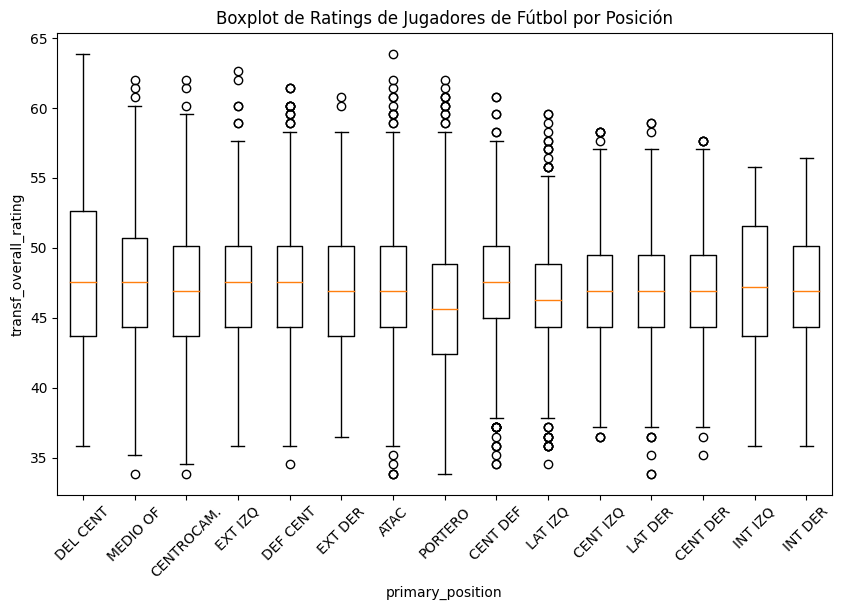

In [ ]:
# Boxplot by continent over overall_rating
fifa_all = fifa_all.dropna(subset=['continent'])
plt.figure(figsize=(10, 6))
plt.boxplot([fifa_all[fifa_all['continent'] == nationality]['transf_overall_rating'] for nationality in fifa_all['continent'].unique()],
            labels=fifa_all['continent'].unique())
plt.xlabel('continent')
plt.ylabel('transf_overall_rating')
plt.title('Boxplot de Ratings de Jugadores de Fútbol por Continente')
plt.xticks(rotation=45)
plt.show()

# Boxplot by position over overall_rating
fifa_all = fifa_all.dropna(subset=['primary_position'])
plt.figure(figsize=(10, 6))
plt.boxplot([fifa_all[fifa_all['primary_position'] == nationality]['transf_overall_rating'] for nationality in fifa_all['primary_position'].unique()],
            labels=fifa_all['primary_position'].unique())
plt.xlabel('primary_position')
plt.ylabel('transf_overall_rating')
plt.title('Boxplot de Ratings de Jugadores de Fútbol por Posición')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# ANOVA continent vs overall_rating
model = ols('transf_overall_rating ~ continent',                 # Model formula
            data = fifa_all).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

# ANOVA continent vs overall_rating
model = ols('transf_overall_rating ~ primary_position',                 # Model formula
            data = fifa_all).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                  sum_sq       df           F         PR(>F)
continent   12692.438428      5.0  137.836968  2.815072e-143
Residual   266856.468521  14490.0         NaN            NaN
                         sum_sq       df         F        PR(>F)
primary_position    3846.803342     14.0  14.43213  3.885115e-35
Residual          275702.103607  14481.0       NaN           NaN


In [ ]:
# Agrupar los datos por continente y calcular la varianza de 'overall_rating' para cada grupo
grouped = fifa_all.groupby('continent')['transf_overall_rating'].apply(list)

# Convertir los datos en una lista de listas
data = [group for group in grouped]

# Aplicar la prueba de Levene desempaquetando los datos
statistic, p_value = levene(*data)

# Imprimir los resultados
print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)

# Agrupar los datos por posición y calcular la varianza de 'overall_rating' para cada grupo
grouped = fifa_all.groupby('primary_position')['overall_rating'].apply(list)

# Convertir los datos en una lista de listas
data = [group for group in grouped]

# Aplicar la prueba de Levene desempaquetando los datos
statistic, p_value = levene(*data)

# Imprimir los resultados
print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)

Estadístico de Levene: 11.353008151211293
Valor p: 5.942315889944732e-11
Estadístico de Levene: 15.899161538525572
Valor p: 2.755061272674813e-39


Como análisis final, vamos a estudiar el impacto de todas las variables numéricas (descartamos las categóricas, ya que requeriría codificarlas y para este ejercicio no las vamos a considerar) en 'transf_overall_rating':

In [ ]:
# ANOVA continent vs overall_rating
model = ols('transf_overall_rating ~ acceleration + age + aggression + agility + balance + ball_control + composure + crossing + curve + dribbling + finishing + freekick_accuracy + heading_accuracy + height_cm + interceptions + jumping + long_passing + long_shots + marking + penalties + positioning + potential + reactions + short_passing + shot_power + sliding_tackle + sprint_speed + stamina + standing_tackle + strength + vision + volleys + weight_kgs',                 # Model formula
            data = fifa_all).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

# Calculate Residual Sum of Squares (SSR)
SSR = model.ssr

# Calculate Total Sum of Squares (SST)
SST = ((fifa_all['transf_overall_rating'] - fifa_all['transf_overall_rating'].mean())**2).sum()

# Calculate Explained Sum of Squares (SSE) as SST - SSR
SSE = SST - SSR

# Calculate R-squared
R_squared = model.rsquared

print(f"Total Sum of Squares (SST): {SST}")
print(f"Explained Sum of Squares (SSE): {SSE}")
print(f"Residual Sum of Squares (SSR): {SSR}")
print(f"Coefficient of Determination (R^2): {R_squared}")

                         sum_sq       df             F        PR(>F)
acceleration          32.104053      1.0     18.116442  2.091090e-05
age                16656.193254      1.0   9399.154575  0.000000e+00
aggression            38.732744      1.0     21.857038  2.963906e-06
agility                8.844786      1.0      4.991147  2.549253e-02
balance              155.122659      1.0     87.536319  9.469963e-21
ball_control          54.142950      1.0     30.553077  3.304775e-08
composure            503.844513      1.0    284.321416  3.444995e-63
crossing             127.060149      1.0     71.700536  2.743356e-17
curve                 12.230298      1.0      6.901605  8.620925e-03
dribbling             11.879507      1.0      6.703652  9.631202e-03
finishing             14.114783      1.0      7.965027  4.775485e-03
freekick_accuracy      0.802954      1.0      0.453110  5.008724e-01
heading_accuracy      80.526028      1.0     45.441150  1.632520e-11
height_cm             68.149660   

De este ANOVA multifactor, podemos observar que todos los factores tienen una influencia estadístiamente significativa en 'transf_overall_rating', pero no todas tienen el mismo impacto por igual. Podemos separarlas en 3 grupos, dependiendo de su p-value y F-stat (menor p-value y mayor F-stat, más significativo):

- Predictores altamente significativos:  'age ', 'potential' y 'reactions' tienen p-values muy bajos, lo que indica que son predictores muy significativos de 'transf_overall_rating'.

- Predictores Significativos: 'balance', 'ball_control', 'composure', 'crossing', 'heading_accuracy', 'jumping', 'penalties', 'positioning', 'stamina', 'strength' y 'weight_kgs' también impactan significativamente en la calificación general, como indican sus bajos p-values.

- Predictores con menor impacto: Algunas variables como 'freekick_accuracy', 'long_shots', 'marking', 'standing_tackle' y 'vision' tienen p-values más altos, lo que sugiere una relación más débil con la calificación general.

Por otro lado, el cálculo de las sumas de cuadrados y residuales (SST, SSE, SSR, R^2), nos indica lo siguiente del modelo:

- Total Sum of Squares (SST): 279,548.91 indica la varianza total en 'transf_overall_rating' dentro de tu conjunto de datos.

- Explained Total Sum of Squares (SSE): 253,920.87 muestra la cantidad de varianza explicada por el modelo. Esta es una parte sustancial de la varianza total, indicando que el modelo hace un buen trabajo capturando los factores que afectan a 'transf_overall_rating'.

- Residual Sum of Squares (SSR): 25,628.04 representa la varianza que el modelo no explica. Aunque no es insignificante, esto es relativamente pequeño en comparación con la varianza total.

- Coeficiente de Determinación (R^2): 0.908, o 90.8%, significa que el modelo explica una gran mayoría de la varianza en 'transf_overall_rating'. Un valor de R^2 de esta magnitud se considera muy bueno y sugiere que el modelo de regresión lineal es altamente efectivo. Los predictores elegidos explican una porción significativa de la varianza en 'transf_overall_rating', haciendo este modelo potencialmente muy útil para fines predictivos o explicativos. La varianza no explicada restante (SSR) podría deberse a factores no incluidos en el modelo, como las variables categóricas, errores de medición o aleatoriedad inherente en los datos.



# 7. Conclusión:

Este análisis ayuda a identificar qué atributos de los jugadores son más influyentes en determinar su calificación general en FIFA. Los atributos relacionados con la condición física, la habilidad y el potencial del jugador juegan roles cruciales en su evaluación.